# Detecting drifts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


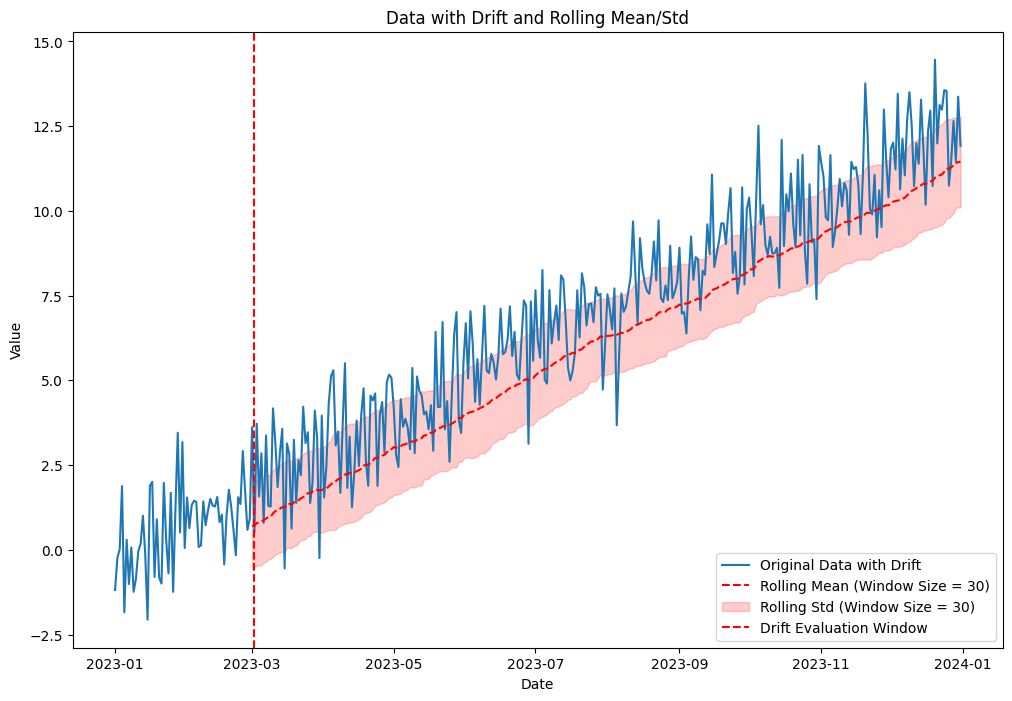

p_value for drift detection:  1.1361995074484214e-40
Drift is statistically significant.


In [2]:
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_drift = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))
data_drift += 0.02 * np.arange(len(date_rng))

df_drift = pd.DataFrame(data_drift, columns=['Value'], index=date_rng)

window_size = 60
df_drift['Rolling_Mean'] = df_drift['Value'].rolling(window=window_size).mean()
df_drift['Rolling_Std'] = df_drift['Value'].rolling(window=window_size).std()

plt.figure(figsize=(12, 8))
plt.plot(df_drift.index, df_drift['Value'], label='Original Data with Drift')
plt.plot(df_drift.index, df_drift['Rolling_Mean'], label='Rolling Mean (Window Size = 30)', linestyle='--', color='red')
plt.fill_between(df_drift.index, df_drift['Rolling_Mean'] - df_drift['Rolling_Std'], df_drift['Rolling_Mean'] + df_drift['Rolling_Std'], color='red', alpha=0.2, label='Rolling Std (Window Size = 30)')
plt.axvline(x=df_drift.index[window_size], color='red', linestyle='--', label='Drift Evaluation Window')
plt.legend()
plt.title('Data with Drift and Rolling Mean/Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

shift_point = window_size
data_before_drift = df_drift['Value'][:shift_point]
data_after_drift = df_drift['Value'][shift_point:]

_, p_value_drift = ttest_ind(data_before_drift, data_after_drift, alternative='two-sided')

alpha_drift = 0.05

print("p_value for drift detection: ", p_value_drift)

if p_value_drift < alpha_drift:
    print(f"Drift is statistically significant.")
else:
    print(f"No statistically significant drift detected.")


# Evaluating at multiple points

p_value for drift detection at location 50: 2.7211412059277674e-29
Drift at location 50 is statistically significant.
p_value for drift detection at location 150: 2.7588888058370616e-85
Drift at location 150 is statistically significant.
p_value for drift detection at location 200: 2.995942694055692e-88
Drift at location 200 is statistically significant.
p_value for drift detection at location 350: 2.5734328063065383e-11
Drift at location 350 is statistically significant.


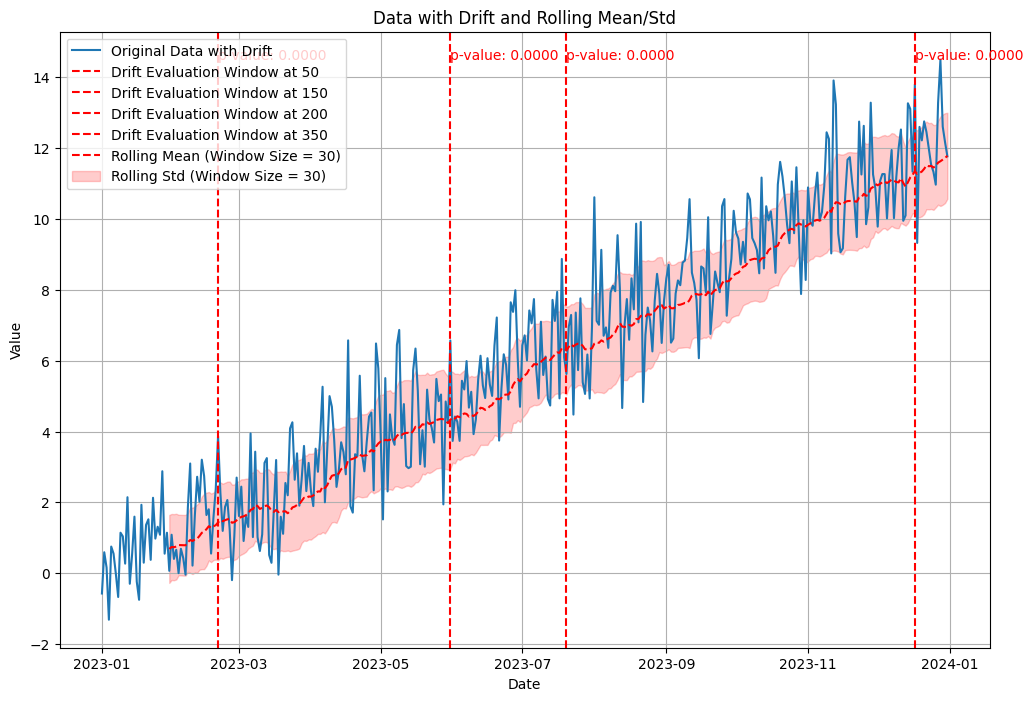

In [3]:
def plot_drift_detection(df, window_size, drift_locations, p_values):
    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df['Value'], label='Original Data with Drift')

    for loc, p_value in zip(drift_locations, p_values):
        plt.axvline(x=df.index[loc], color='red', linestyle='--', label=f'Drift Evaluation Window at {loc}')
        plt.text(df.index[loc], df['Value'].max(), f'p-value: {p_value:.4f}', color='red')

    df['Rolling_Mean'] = df['Value'].rolling(window=window_size).mean()
    df['Rolling_Std'] = df['Value'].rolling(window=window_size).std()

    plt.plot(df.index, df['Rolling_Mean'], label=f'Rolling Mean (Window Size = {window_size})', linestyle='--', color='red')
    plt.fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], color='red', alpha=0.2, label=f'Rolling Std (Window Size = {window_size})')

    plt.legend()
    plt.title('Data with Drift and Rolling Mean/Std')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Generate data with drift
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_drift = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))

data_drift += 0.02 * np.arange(len(date_rng))

df_drift = pd.DataFrame(data_drift, columns=['Value'], index=date_rng)

window_size = 30
drift_locations = [50, 150, 200, 350]
p_values = []

for loc in drift_locations:
    shift_point = loc
    data_before_drift = df_drift['Value'][:shift_point]
    data_after_drift = df_drift['Value'][shift_point:]

    _, p_value_drift = ttest_ind(data_before_drift, data_after_drift, alternative='two-sided')
    p_values.append(p_value_drift)

    alpha_drift = 0.05

    print(f"p_value for drift detection at location {loc}: {p_value_drift}")

    if p_value_drift < alpha_drift:
        print(f"Drift at location {loc} is statistically significant.")
    else:
        print(f"No statistically significant drift detected at location {loc}.")

plot_drift_detection(df_drift, window_size, drift_locations, p_values)
